# US Tech Company Stats

In [1]:
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.express import *
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Tech-Companies2022-2023.csv')
df.head(10)

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473
5,Tesla,Technology,Software Infrastructure,Texas,2003,81.46,0.625,TSLA,1.132,127855
6,Meta Platforms,Technology,Software Infrastructure,California,2004,116.60,0.524,META,5.619,86482
7,Broadcom Inc.,Technology,Semiconductors,California,1961,34.41,0.266,AVGO,0.939,20000
8,Oracle Corporation,Technology,Software Infrastructure,Texas,1977,46.07,0.236,ORCL,0.932,143000
9,Cisco Systems Inc.,Technology,Communication Equipments,California,1984,53.16,0.208,CSCO,2.665,83300


## Processing and Cleaning 

### Rename the columns so that they make sense. We can use rename() method by passing in a dictionary of old and new names

In [3]:
df.rename(columns={'Company Name':'Company', 'HQ State':'HQ_State','Founding Year':'Founding','Annual Revenue 2022-2023 (USD in Billions)':'Revenue_USD','Market Cap (USD in Trillions)':'MarketCap_with_Trillions','Annual Income Tax in 2022-2023 (USD in Billions)':'Annual_Income_Tax_in_Billions','Employee Size':'Employee','Stock Name':'Stock_Name'}, inplace=True)
df.columns

Index(['Company', 'Industry', 'Sector', 'HQ_State', 'Founding', 'Revenue_USD',
       'MarketCap_with_Trillions', 'Stock_Name',
       'Annual_Income_Tax_in_Billions', 'Employee'],
      dtype='object')

In [4]:
df.isnull().sum()

Company                          0
Industry                         0
Sector                           0
HQ_State                         0
Founding                         0
Revenue_USD                      0
MarketCap_with_Trillions         0
Stock_Name                       0
Annual_Income_Tax_in_Billions    0
Employee                         0
dtype: int64

# Data Wringling

In [5]:
# Convert 'Founding' column to datetime format
df['Founding'] = pd.to_datetime(df['Founding'], format='%Y')


In [6]:
# Remove any rows with zero or negative values in the 'Employee' column
df = df[df['Employee'] > 0]

In [7]:
# Reset the index after filtering the data
df = df.reset_index(drop=True)

In [8]:
# Save the cleaned data to a new CSV file
df.to_csv('us_tech_stats_cleaned.csv', index=False)


In [9]:
df.head().info

<bound method DataFrame.info of                  Company    Industry                   Sector    HQ_State  \
0             Apple Inc.  Technology     Consumer Electronics  California   
1  Microsoft Corporation  Technology  Software Infrastructure  Washington   
2      Alphabet (Google)  Technology  Software Infrastructure  California   
3                 Amazon  Technology     Software Application  Washington   
4     NVIDIA Corporation  Technology           Semiconductors  California   

    Founding  Revenue_USD  MarketCap_with_Trillions Stock_Name  \
0 1976-01-01       387.53                     2.520       AAPL   
1 1975-01-01       204.09                     2.037       MSFT   
2 1998-01-01       282.83                     1.350       GOOG   
3 1994-01-01       513.98                     1.030       AMZN   
4 1993-01-01        26.97                     0.653       NVDA   

   Annual_Income_Tax_in_Billions  Employee  
0                         18.314    164000  
1                 

In [10]:
df.describe()

,Revenue_USD,MarketCap_with_Trillions,Annual_Income_Tax_in_Billions,Employee
count,50.00000,50.000000,50.000000,5.000000e+01
mean,51.20440,0.252160,1.386780,8.324962e+04
std,97.41288,0.490377,3.687916,2.205869e+05
min,2.06000,0.028000,-3.217000,2.993000e+03
25%,7.65250,0.051250,0.098750,1.415000e+04
50%,17.66500,0.082500,0.280500,2.472500e+04
75%,40.81500,0.160250,0.945000,7.015575e+04
max,513.98000,2.520000,18.314000,1.541000e+06


In [11]:
df.shape

(50, 10)

### Extracting profits (Annual Revenue 2022-2023 (USD in Billions)) for this Tech Companies

In [12]:
df.head(10)

,Company,Industry,Sector,HQ_State,Founding,Revenue_USD,MarketCap_with_Trillions,Stock_Name,Annual_Income_Tax_in_Billions,Employee
0,Apple Inc.,Technology,Consumer Electronics,California,1976-01-01,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975-01-01,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998-01-01,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994-01-01,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993-01-01,26.97,0.653,NVDA,0.189,22473
5,Tesla,Technology,Software Infrastructure,Texas,2003-01-01,81.46,0.625,TSLA,1.132,127855
6,Meta Platforms,Technology,Software Infrastructure,California,2004-01-01,116.60,0.524,META,5.619,86482
7,Broadcom Inc.,Technology,Semiconductors,California,1961-01-01,34.41,0.266,AVGO,0.939,20000
8,Oracle Corporation,Technology,Software Infrastructure,Texas,1977-01-01,46.07,0.236,ORCL,0.932,143000
9,Cisco Systems Inc.,Technology,Communication Equipments,California,1984-01-01,53.16,0.208,CSCO,2.665,83300


### Compare the trend of top 12 companies that contributed the most Revenue With US Dollars

In [13]:
inplace = True 
df.sort_values(by=['Revenue_USD'], ascending=False, axis=0, inplace=True)
df.head()

,Company,Industry,Sector,HQ_State,Founding,Revenue_USD,MarketCap_with_Trillions,Stock_Name,Annual_Income_Tax_in_Billions,Employee
3,Amazon,Technology,Software Application,Washington,1994-01-01,513.98,1.030,AMZN,-3.217,1541000
0,Apple Inc.,Technology,Consumer Electronics,California,1976-01-01,387.53,2.520,AAPL,18.314,164000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998-01-01,282.83,1.350,GOOG,11.356,190234
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975-01-01,204.09,2.037,MSFT,15.139,221000
6,Meta Platforms,Technology,Software Infrastructure,California,2004-01-01,116.60,0.524,META,5.619,86482


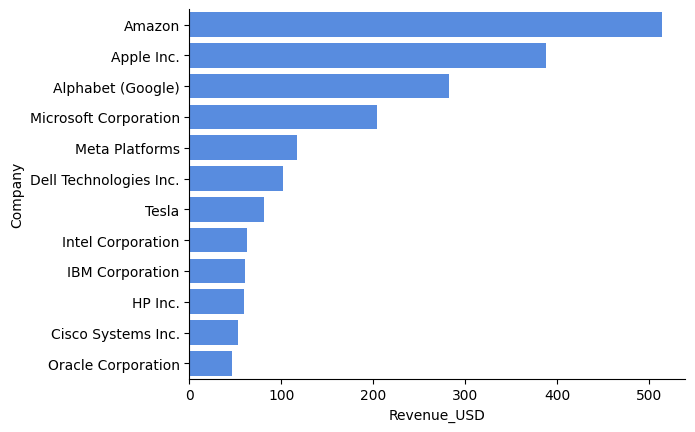

In [14]:
sns.barplot(data=df.head(12), x="Revenue_USD", y="Company", color='#4287f5')
sns.despine()

### Numbers of Employees for the first 7 Companies in DataFrame

In [15]:
df.sort_values(by='Employee', ascending=False, inplace=True)
df.head(7)

,Company,Industry,Sector,HQ_State,Founding,Revenue_USD,MarketCap_with_Trillions,Stock_Name,Annual_Income_Tax_in_Billions,Employee
3,Amazon,Technology,Software Application,Washington,1994-01-01,513.98,1.030,AMZN,-3.217,1541000
18,IBM Corporation,Technology,IT Services,New York,1911-01-01,60.52,0.113,IBM,-0.626,345000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975-01-01,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998-01-01,282.83,1.350,GOOG,11.356,190234
0,Apple Inc.,Technology,Consumer Electronics,California,1976-01-01,387.53,2.520,AAPL,18.314,164000
8,Oracle Corporation,Technology,Software Infrastructure,Texas,1977-01-01,46.07,0.236,ORCL,0.932,143000
48,Dell Technologies Inc.,Technology,Computer Hardware,Texas,1984-01-01,102.30,0.028,DELL,0.981,133000


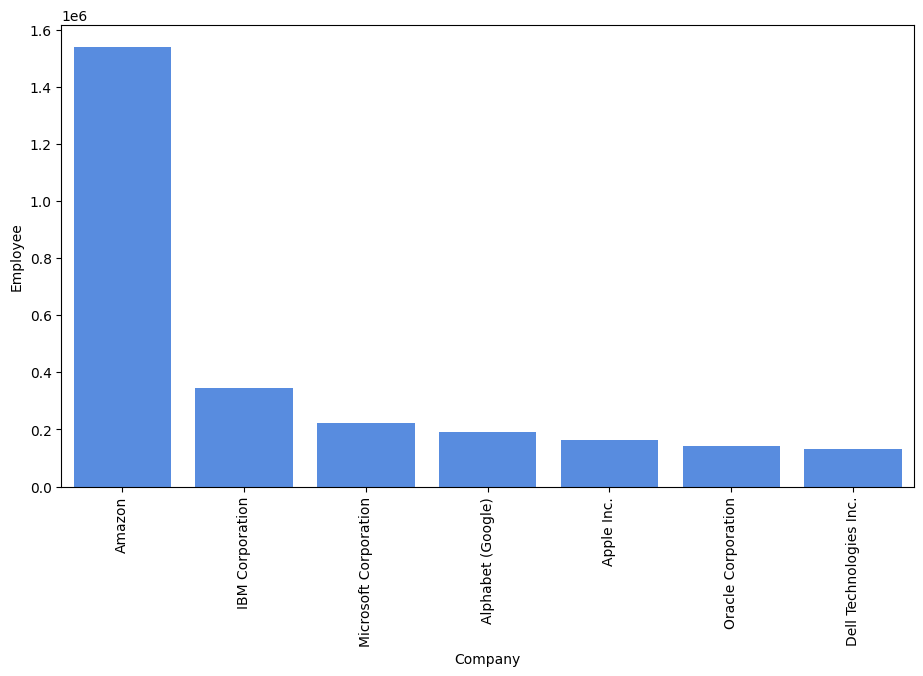

In [16]:
plt.figure(figsize=(11, 6))
sns.barplot(x='Company', y='Employee', data=df.head(7), color='#4287f5')
plt.xticks(rotation=90)
plt.show()


### Another Compare the trend of top 10 companies that contributed the most MarketCap with Trillions¶

In [17]:
inplace = True 
df.sort_values(by=['MarketCap_with_Trillions'], ascending=False, axis=0, inplace=True)
df.head(10)

,Company,Industry,Sector,HQ_State,Founding,Revenue_USD,MarketCap_with_Trillions,Stock_Name,Annual_Income_Tax_in_Billions,Employee
0,Apple Inc.,Technology,Consumer Electronics,California,1976-01-01,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975-01-01,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998-01-01,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994-01-01,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993-01-01,26.97,0.653,NVDA,0.189,22473
5,Tesla,Technology,Software Infrastructure,Texas,2003-01-01,81.46,0.625,TSLA,1.132,127855
6,Meta Platforms,Technology,Software Infrastructure,California,2004-01-01,116.60,0.524,META,5.619,86482
7,Broadcom Inc.,Technology,Semiconductors,California,1961-01-01,34.41,0.266,AVGO,0.939,20000
8,Oracle Corporation,Technology,Software Infrastructure,Texas,1977-01-01,46.07,0.236,ORCL,0.932,143000
9,Cisco Systems Inc.,Technology,Communication Equipments,California,1984-01-01,53.16,0.208,CSCO,2.665,83300


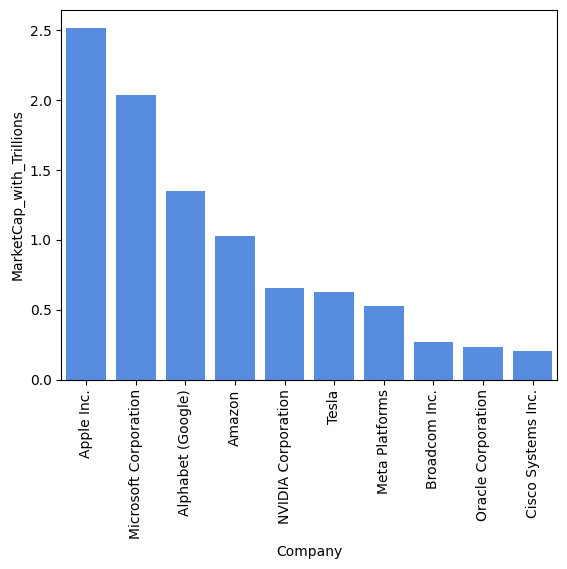

In [18]:
sns.barplot(x='Company', y='MarketCap_with_Trillions', data=df.head(10), color='#4287f5')
plt.xticks(rotation=90)
plt.show()